# Disease Prediction

## 1. Loading Data

In [7]:
import pandas as pd

# Load the dataset
data = pd.read_csv('Training.csv')

# Display the first few rows of the dataframe
data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


## 2. Exploratory Data Analysis

In [8]:
# Dataset overview
data.info()

# Check for missing values
missing_values = data.isnull().sum().sum()
print(f"Missing values in the dataset: {missing_values}")

# Assuming the 'Unnamed: 133' column is removed and missing values are handled
data= data.drop(columns=['Unnamed: 133'])

# Basic statistics
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 134 entries, itching to Unnamed: 133
dtypes: float64(1), int64(132), object(1)
memory usage: 5.0+ MB
Missing values in the dataset: 4920


,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,...,0.021951,0.021951,0.021951,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171
std,0.344730,0.366417,0.146539,0.207593,0.146539,0.368667,0.346007,0.207593,0.207593,0.146539,...,0.146539,0.146539,0.146539,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Symptom Frequency Analysis

<Axes: >

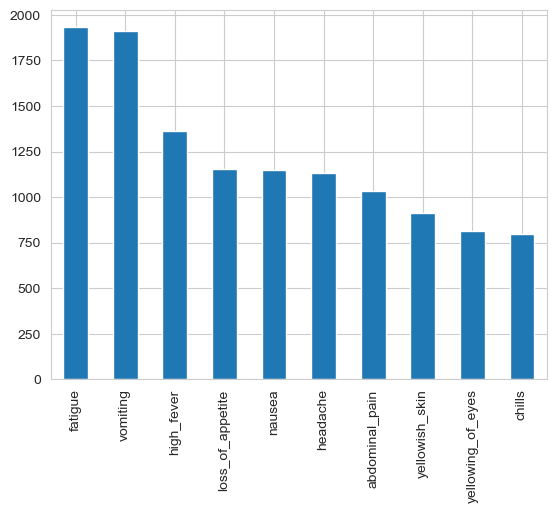

In [9]:
# Calculate the frequency of each symptom
symptom_frequency = data.drop('prognosis', axis=1).sum().sort_values(ascending=False)

# Plot the top 10 most frequent symptoms
symptom_frequency.head(10).plot(kind='bar')

## Prognosis Distribution Analysis

<Axes: xlabel='prognosis'>

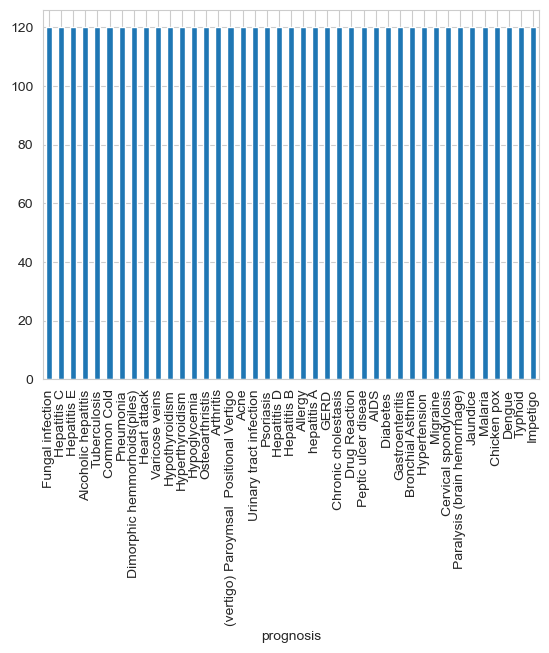

In [10]:
# Distribution of diagnoses in the dataset
prognosis_distribution = data['prognosis'].value_counts()

# Plot the distribution
prognosis_distribution.plot(kind='bar')

## Correlation Analysis

<Axes: >

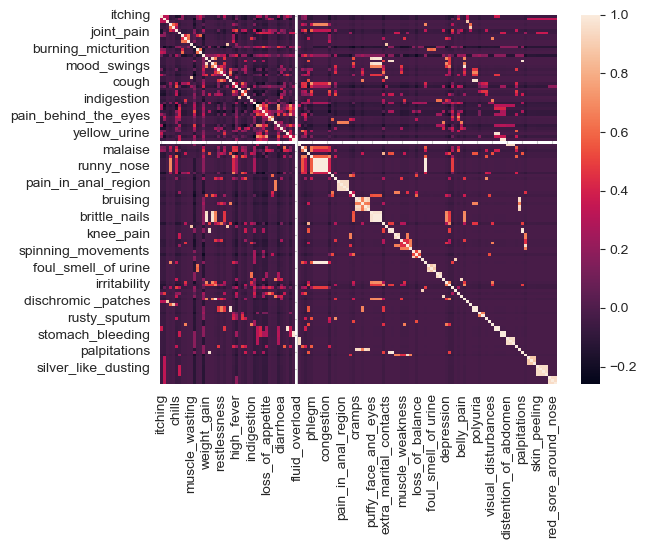

In [11]:
# Correlation matrix
import seaborn as sns

correlation_matrix = data.drop('prognosis', axis=1).corr()
sns.heatmap(correlation_matrix)


## Symptom Importance for Diagnoses

In [12]:
# Analyze symptom importance for each diagnosis
symptom_importance = data.groupby('prognosis').mean()

# Display symptoms that are uniquely present in each diagnosis
unique_symptoms_per_diagnosis = symptom_importance[symptom_importance == 1].stack()
print(unique_symptoms_per_diagnosis)

prognosis                                      
Chicken pox      malaise                           1.0
                 red_spots_over_body               1.0
Common Cold      phlegm                            1.0
                 throat_irritation                 1.0
                 redness_of_eyes                   1.0
                 sinus_pressure                    1.0
                 runny_nose                        1.0
                 congestion                        1.0
                 chest_pain                        1.0
                 loss_of_smell                     1.0
                 muscle_pain                       1.0
Dengue           headache                          1.0
                 nausea                            1.0
                 loss_of_appetite                  1.0
                 pain_behind_the_eyes              1.0
                 back_pain                         1.0
Diabetes         increased_appetite                1.0
                 

## Diagnosis Complexity Analysis

In [13]:
# Calculate the total number of symptoms for each diagnosis
diagnosis_complexity = data.drop('prognosis', axis=1).sum(axis=1)

# Add prognosis to this series
diagnosis_complexity = pd.concat([data['prognosis'], diagnosis_complexity], axis=1)
diagnosis_complexity.columns = ['Prognosis', 'Total Symptoms']

# Average number of symptoms per diagnosis
average_symptoms_per_diagnosis = diagnosis_complexity.groupby('Prognosis').mean().sort_values(by='Total Symptoms', ascending=False)
print(average_symptoms_per_diagnosis)


                                         Total Symptoms
Prognosis                                              
Common Cold                                       16.60
Tuberculosis                                      15.60
Dengue                                            13.55
Hypothyroidism                                    12.60
Hepatitis E                                       12.60
Hepatitis B                                       11.60
Hypoglycemia                                      11.60
Hyperthyroidism                                   10.60
hepatitis A                                       10.60
Pneumonia                                         10.60
Typhoid                                           10.60
Chicken pox                                       10.55
Diabetes                                           9.60
Migraine                                           8.55
Hepatitis D                                        8.55
Malaria                                         

## Cluster Analysis

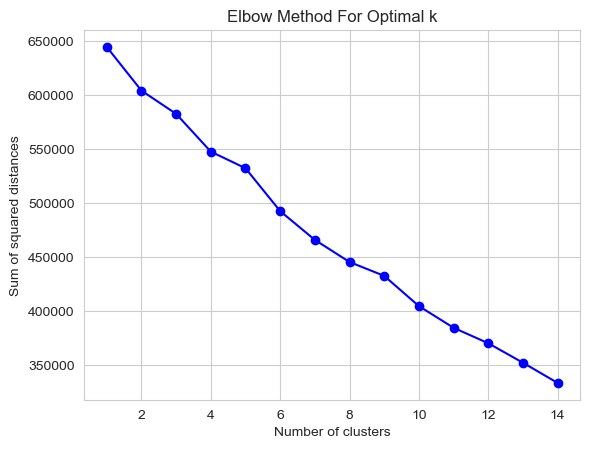

In [14]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Standardize the data
data_for_clustering = data.drop('prognosis', axis=1)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_clustering)

# Elbow method to determine the optimal number of clusters
ssd = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)  # Explicitly setting n_init to 10
    kmeans.fit(data_scaled)
    ssd.append(kmeans.inertia_)

plt.plot(range(1, 15), ssd, 'bo-')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.show()

## Direct Testing of Machine Learning Model

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Prepare data
X = data.drop('prognosis', axis=1)
y = data['prognosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and test the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy: 1.0
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        18
                                   AIDS       1.00      1.00      1.00        30
                                   Acne       1.00      1.00      1.00        24
                    Alcoholic hepatitis       1.00      1.00      1.00        25
                                Allergy       1.00      1.00      1.00        24
                              Arthritis       1.00      1.00      1.00        23
                       Bronchial Asthma       1.00      1.00      1.00        33
                   Cervical spondylosis       1.00      1.00      1.00        23
                            Chicken pox       1.00      1.00      1.00        21
                    Chronic cholestasis       1.00      1.00      1.00        15
                            Common Cold       1.00      1.00      1.00        23
             

In [17]:
from joblib import dump

# Assuming 'model' is your trained RandomForestClassifier
dump(model, 'diagnosis_predictor.joblib')

['label_encoder.joblib']

NameError: name 'label_encoder' is not defined